The IPL Matches file has the following data fields:

  - id: Record id
  - season : Year in which the match took place
  - city : city where the match took place
  - date : date
  - team1 : Name of team 1
  - team2 : name of team 2
  - toss_winner : winner of the toss
  - toss_decision : decision made by the toss winner (to bat first or to field first)
  - result : match result (normal or tie)
  - dl_applied : Duckworth-Lewis rule applied during the match
  - winner : winner of the match
  - win_by_runs : by how many runs the team won
  - win_by_wickets : by how  many wickets the team won
  - player_of_match : player of the match
  - venue : stadium where the match took place
  - umpire1 : On field Umpire 1
  - umpire2 : On field Umpire 2
  - umpire3 : Third Umpire

#### Questions we are trying to answer
  - How many matches where played each year?
  - How many matches were won by the team who won the toss and elected to field first?
  - How many matches were won by the team who won the toss and elected to bat first?
  - Find the number of wins while Batting first or fielding first over the years
  - City where the most number of matches were played
  - Over the years does teams prefer fielding first or batting first?

In [1]:
#Import the necessary libraries
import numpy as np # numerical computing 
import pandas as pd # data processing
import matplotlib.pyplot as plt #visualization
import seaborn as sns

In [2]:
# Read the matches data
df = pd.read_csv('matches.csv')

In [3]:
#lets take a look at the data frame
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
## Most number of matches were played in 2013. A total of 76 matches.
df['season'].value_counts(ascending = True)

2009    57
2008    58
2015    59
2017    59
2010    60
2014    60
2016    60
2011    73
2012    74
2013    76
Name: season, dtype: int64

#### How many matches where played each year?  
  - 2009 had the lowest number of matches - 57
  - 2013 had the highest number of matches - 76

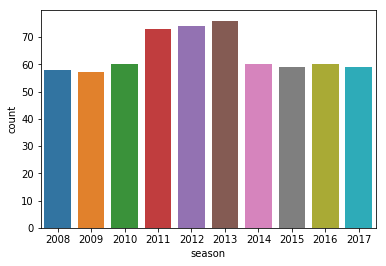

In [5]:
# Lets see how many matches were played each year. Lets visualize
sns.countplot(x='season', data=df)
plt.show()

In [6]:
## Total number of matches played in each venue. Mumbai wins here. A total of 85 were played in Mumbai.
## Here we can also see the foreign cities where IPL matches were conducted
venues = df['city'].value_counts()
print(venues)

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Abu Dhabi          7
Cape Town          7
Port Elizabeth     7
Cuttack            7
Ranchi             7
Sharjah            6
Raipur             6
Indore             5
Kochi              5
Kanpur             4
East London        3
Kimberley          3
Nagpur             3
Bloemfontein       2
Name: city, dtype: int64


#### City where the most number of matches were played
  - 85 matches were played in Mumbai over the years
  - Only 2 matches were played in Bloemfontein
  - You can also see the list of foregin venues where an IPL match was hosted
    - Durban
    - Centurion
    - Johannesburg
    - Abu Dhabi
    - Cape Town
    - Port Elizabeth
    - Sharjah
    - East London
    - Kimberley
    - Bloemfontein

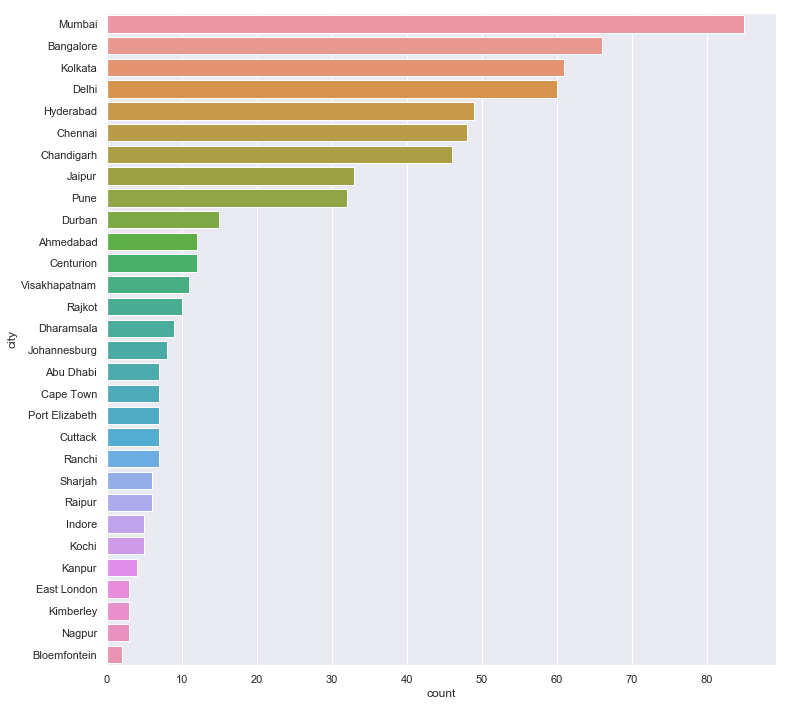

In [7]:
## Lets visualize the data
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(y='city', data=df, order = df['city'].value_counts().index)
plt.show()

In [8]:
## How many matches were won by the team who won the toss and elected to field first?
field_won_df = df[ (df['toss_decision'] == 'field') & (df['win_by_wickets'] > 0) & (df['result']=='normal') ]
field_won_df['season'].value_counts()

2016    30
2017    28
2011    27
2014    24
2008    19
2012    18
2013    14
2015    13
2009    13
2010    10
Name: season, dtype: int64

#### How many matches were won by the team who won the toss and elected to field first??
  - In 2016, the team that won the toss won and elected to field first won 30 games
  - The lowest was in 2010 where only 10 times the team winning the toss eleciting to field fist won the game

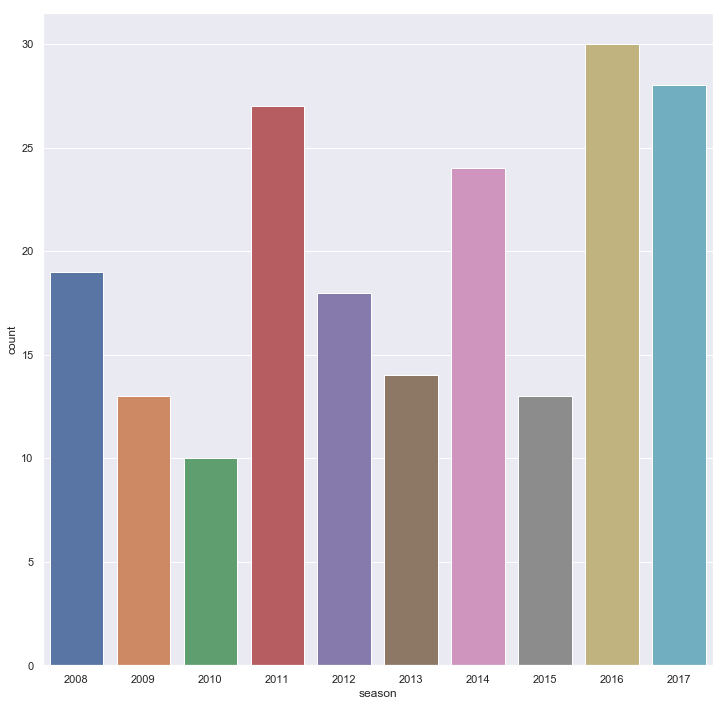

In [9]:
## Won the toss and chose to field first. The team fielding first won the match
sns.countplot(x='season', data=field_won_df)
plt.show()

In [10]:
## Winner of match is equal to winner of the toss
bat_won_df = df[ (df['toss_decision'] == 'bat') & (df['win_by_runs'] > 0) & (df['result']=='normal') ]
bat_won_df['season'].value_counts()

2013    21
2010    21
2009    19
2012    15
2015    14
2011    12
2008    11
2017     6
2014     5
2016     2
Name: season, dtype: int64

#### How many matches were won by the team who won the toss and bat to field first??
  - In 2013 and 2010, the team that won the toss won and elected to bat first won 21 games
  - The lowest was in 2016 where only 2 times the team winning the toss electing to bat fist won the game. (need to check further)

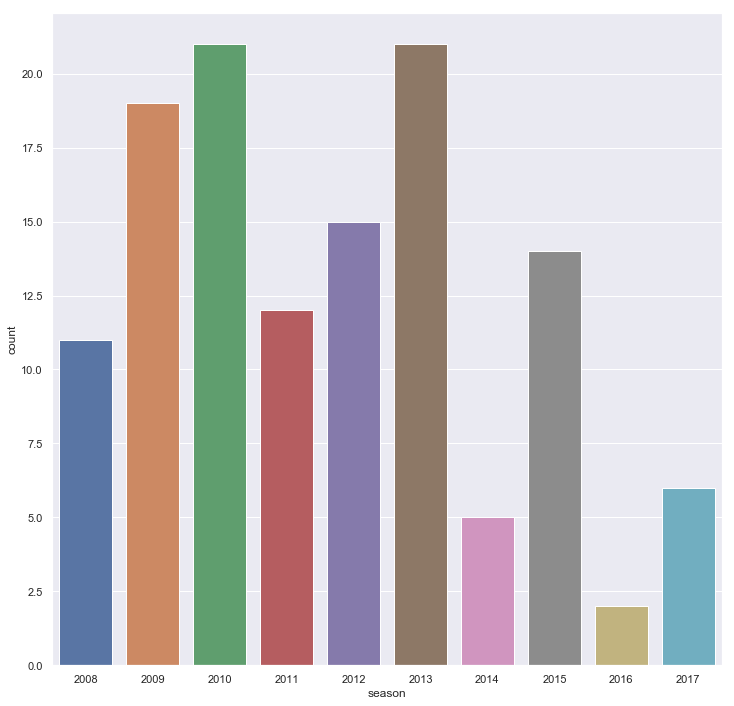

In [11]:
## Won the toss and chose to bat first. The team batting first won the match
sns.countplot(x='season', data=bat_won_df)
plt.show()

In [12]:
## Winner of match is equal to winner of the toss
toss_df = df[ df['toss_winner'] == df['winner']]
toss_df['season'].value_counts()

2011    38
2013    36
2017    34
2016    34
2012    33
2009    33
2010    31
2014    30
2015    28
2008    28
Name: season, dtype: int64

#### How many matches were won by the team who won the toss?
  - In 2011, the team that won the toss won 38 games
  - The lowest was in 2008 where only 28 times the team winning the toss eleciting to field fist won the game

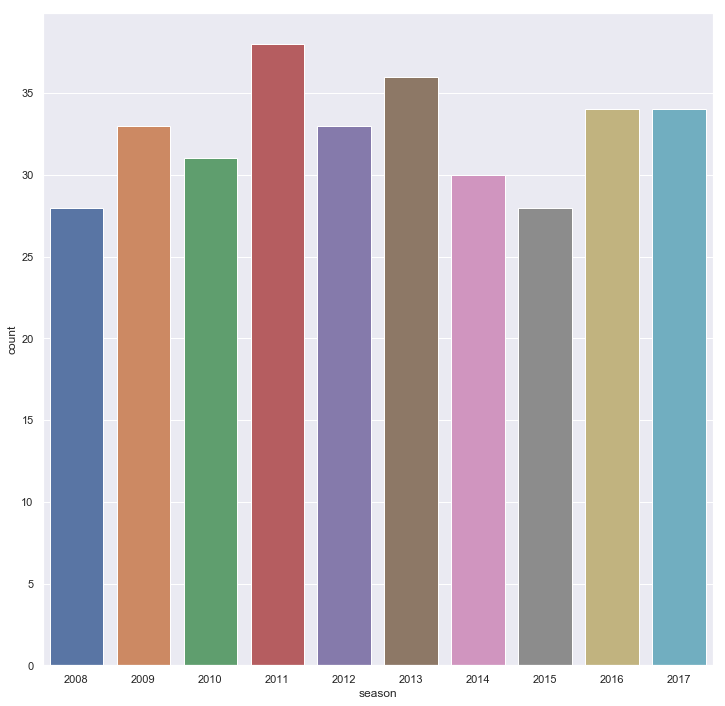

In [13]:
## Winner of match is equal to winner of the toss. Lets visualize it
sns.countplot(x='season', data=toss_df)
plt.show()

In [14]:
field_won_df = field_won_df.assign(decision = 'field first')
bat_won_df = bat_won_df.assign(decision = 'bat first')
concatenated_df = pd.concat([field_won_df, bat_won_df])

Text(0.5, 1.0, 'Wins vs Batting First / Fielding First Aftering winning the Toss')

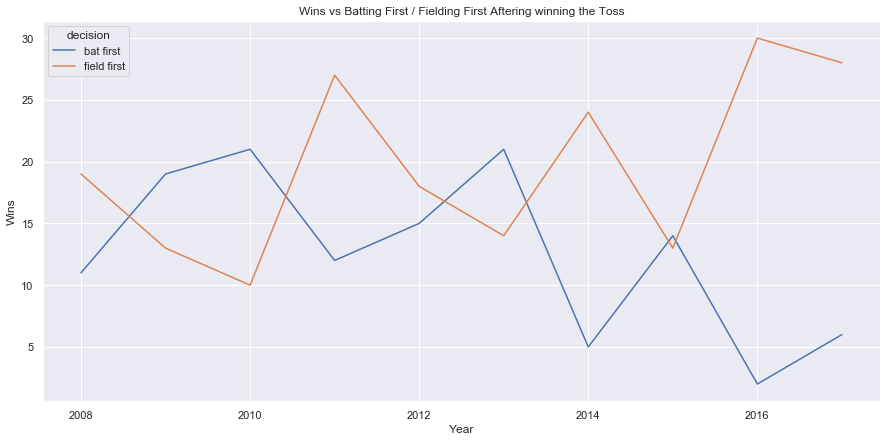

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
concatenated_df.groupby(['season','decision']).count()['id'].unstack().plot(ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Wins")
ax.set_title("Wins vs Batting First / Fielding First Aftering winning the Toss")

#### Find the number of wins while Batting first or fielding first over the years
  - In 2016, team winning the toss and electing to field first won more times compared to the team winning the toss and electing to bat first. The team electing to bat first only won 2 games
  - Does it mean that the teams are confident chasing? Need more data to analyze this.

Text(0.5, 1.0, 'Wins vs Batting First / Fielding First Aftering winning the Toss')

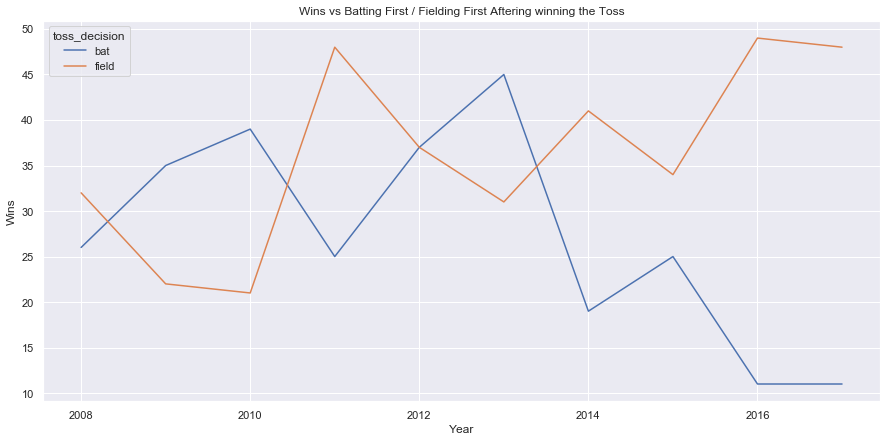

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['season','toss_decision']).count()['id'].unstack().plot(ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Wins")
ax.set_title("Wins vs Batting First / Fielding First Aftering winning the Toss")

#### Over the years does teams prefer fielding first or batting first?
  - Seems like, for the last few years, teams prefer fielding first compared to batting first
  - In 2016 almost 50 times the team winning the toss chose to field first. And only 11 times the team winning the toss chose to bat first
  - 2013 is the year where most number of teams chose to bat first after winning the toss

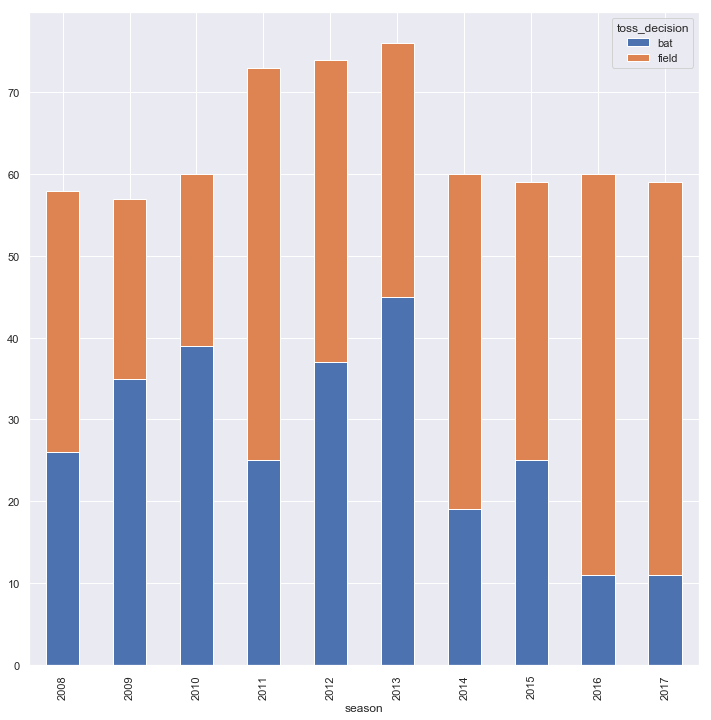

In [19]:
# Lets try a stacked bar chart to get a better view
df2 = df.groupby(['season','toss_decision']).count()['id'].unstack()
df2[['bat','field']].plot(kind='bar', stacked=True)

From the above visualization it seems that from 2014 IPL Season onwards the team winning the toss chooses to field first.